# Pymaceuticals Inc.
---

### Analysis

- The correlation in Capomulin Regimen between mouse weight and the average tumor volume is 0.84. I can say that the correlatin is strong possitive that means that the more is mouse weight, the greater is average tumor volume.

- The greatest number of Mices tested is Capomulin (230), the smallest is Propriva (148)

- Distribution between Male and Female Mices is 51% vs 49%.

- In four Regements checked just one Infubinol has potential outlier.

- From box plot, we can see that Final Tumor in Capomulin and Ramicane is smaller than in Infubinol and Ceftamin.

- Mouse that was theated with Capomulin has the smallest Tumor Volume in about 35 day and after that Tumot Volume is growing up.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results, mouse_metadata,
                                 how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_mouse = combined_df["Mouse ID"].nunique()
number_mouse

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse_ID = combined_df.loc[combined_df.duplicated(["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicated_mouse_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = combined_df.loc[combined_df["Mouse ID"] == duplicated_mouse_ID[0]]
duplicated_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combinedclean_df = combined_df[combined_df["Mouse ID"] !=duplicated_mouse_ID[0]]
combinedclean_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
number_mouse_clean = combinedclean_df["Mouse ID"].nunique()
number_mouse_clean

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_reg_mean = combinedclean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_reg_median = combinedclean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_reg_var = combinedclean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_reg_stdev = combinedclean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_reg_sterr = combinedclean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

summary = pd.DataFrame({"Mean Tumor Volume": drug_reg_mean,
                        "Median Tumor Volume": drug_reg_median,
                       "Tumor Volume Variance": drug_reg_var,
                       "Tumor Volume Std. Dev.": drug_reg_stdev,
                       "Tumor Volume Std. Err.": drug_reg_sterr})
                     
summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.
combinedclean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(["mean", "median", "var", "std","sem"])

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [9]:
total_and_drug = combinedclean_df["Drug Regimen"].value_counts()
total_and_drug

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

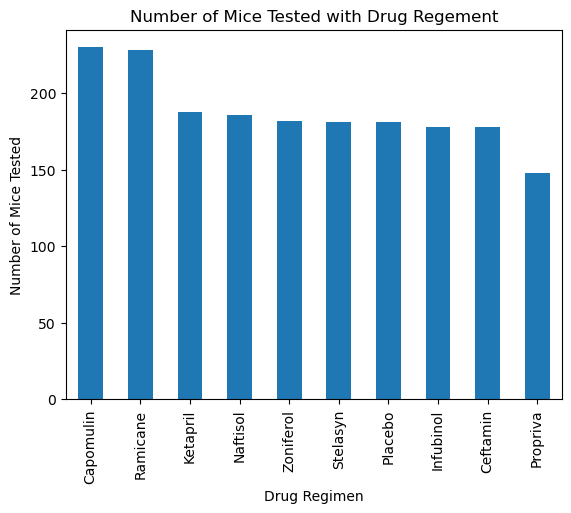

<Figure size 640x480 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
total_and_drug.plot(kind="bar", xlabel = "Drug Regimen", ylabel = "Number of Mice Tested", title = "Number of Mice Tested with Drug Regement")
plt.show()
plt.tight_layout()

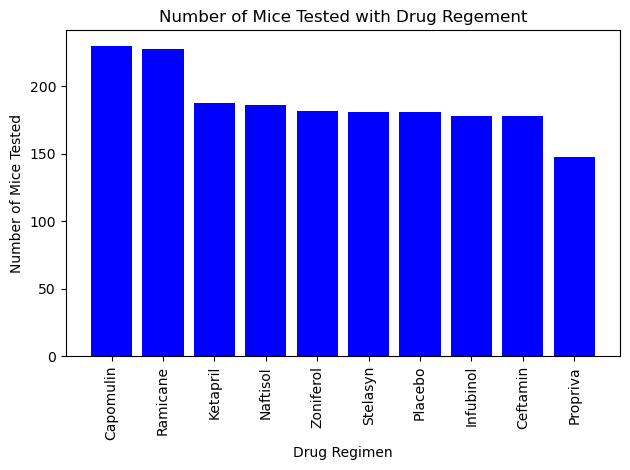

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = total_and_drug.index.values
y_axis = total_and_drug.values
tick_locations = [value for value in x_axis]

plt.bar(x_axis, y_axis, color='b', align="center")
plt.xticks(tick_locations, x_axis, rotation="vertical")

plt.title("Number of Mice Tested with Drug Regement")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")


plt.tight_layout()
plt.show()

In [12]:
malefem = combinedclean_df["Sex"].value_counts()
malefem

Male      958
Female    922
Name: Sex, dtype: int64

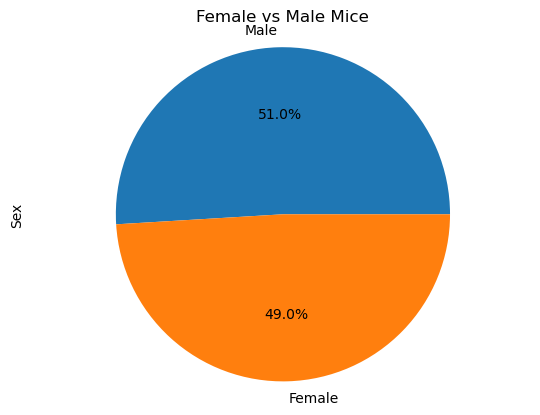

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
malefem_pie = malefem.plot(kind="pie", y='Sex', autopct='%1.1f%%', title = "Female vs Male Mice")

plt.axis("equal")
plt.show()

(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

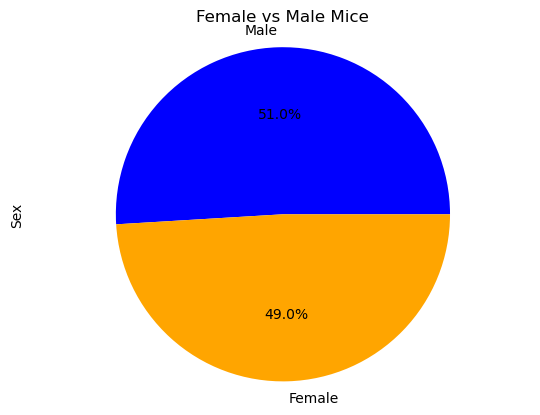

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
x_axis = malefem.index.values
y_axis = malefem.values

colors = ["blue", "orange"]

plt.pie(y_axis, labels=x_axis, colors=colors, autopct="%1.1f%%")

plt.title("Female vs Male Mice")
plt.ylabel("Sex")
plt.axis("equal")



## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin_df = combinedclean_df.loc[combinedclean_df["Drug Regimen"] == "Capomulin",:]
Ramicane_df = combinedclean_df.loc[combinedclean_df["Drug Regimen"] == "Ramicane", :]
Infubinol_df = combinedclean_df.loc[combinedclean_df["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combinedclean_df.loc[combinedclean_df["Drug Regimen"] == "Ceftamin", :]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Ramicane_last = Ramicane_df.groupby('Mouse ID').max()['Timepoint']
Infubinol_last = Infubinol_df.groupby('Mouse ID').max()['Timepoint']
Ceftamin_last = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Capomulin_vol = pd.DataFrame(Capomulin_last)
Ramicane_vol = pd.DataFrame(Ramicane_last)
Infubinol_vol = pd.DataFrame(Infubinol_last)
Ceftamin_vol = pd.DataFrame(Ceftamin_last)

In [16]:
Capomulin_merge = pd.merge(Capomulin_vol, combinedclean_df, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge = pd.merge(Ramicane_vol, combinedclean_df, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge = pd.merge(Infubinol_vol, combinedclean_df, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge = pd.merge(Ceftamin_vol, combinedclean_df, on=("Mouse ID","Timepoint"),how="left")

all_merged = pd.concat([Capomulin_merge, Ramicane_merge, Infubinol_merge, Ceftamin_merge ], axis=0)
#all_reset = all_merged.reset_index()
all_merged

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
20,x226,0,45.000000,0,Ceftamin,Male,23,28
21,x581,45,64.634949,3,Ceftamin,Female,19,28
22,x822,45,61.386660,3,Ceftamin,Male,3,29
23,y769,45,68.594745,4,Ceftamin,Female,6,27


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatment:
    
    vol = all_merged.loc[all_merged["Drug Regimen"]==x]["Tumor Volume (mm3)"]
    tumor_vol.append(vol)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    
    # add subset 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = vol.loc[(vol > upper_bound) | (vol < lower_bound)]
    #if len(outliers) > 0:
    print(f"{x}'s potential outliers: {outliers}.")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).
Infubinol's potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64.
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64).


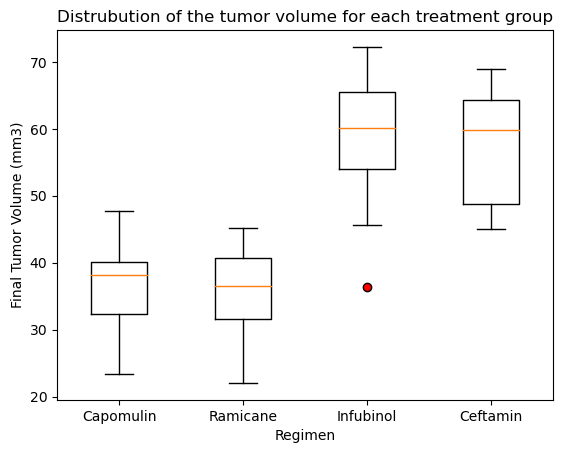

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
red_circle = dict(markerfacecolor='red', marker='o')

plt.boxplot(tumor_vol, labels = treatment, flierprops=red_circle)

plt.xlabel("Regimen")
plt.title('Distrubution of the tumor volume for each treatment group')
plt.ylabel('Final Tumor Volume (mm3)')

plt.show()


## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

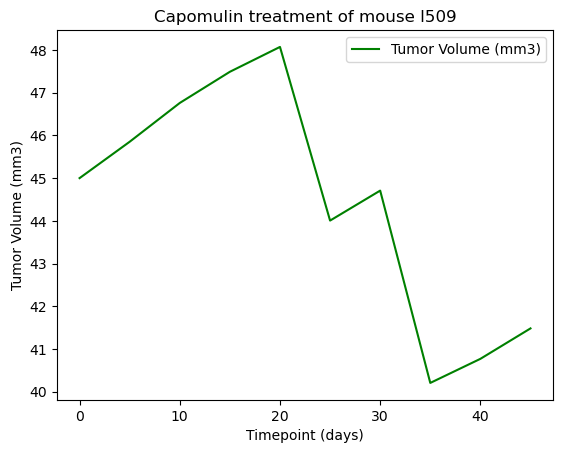

In [19]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
lines = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "l509",:]
lines_plot = lines.get(['Timepoint','Tumor Volume (mm3)'])
lines_index = lines_plot.set_index(['Timepoint'])
line_plot = lines_index.plot.line(color="green",label="Mouse ID s185")

plt.legend(loc="best")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

/var/folders/w8/c8d6bpbd6y91x2fnvj77g7pc0000gn/T/ipykernel_28391/2469696125.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scat = Capomulin_df.groupby("Mouse ID").mean()


Text(0, 0.5, 'Average Tumor Volume (mm3)')

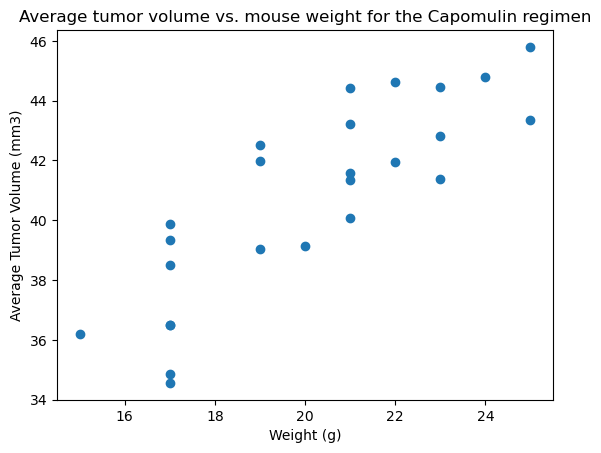

In [20]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
scat = Capomulin_df.groupby("Mouse ID").mean()
plt.scatter(scat['Weight (g)'], scat['Tumor Volume (mm3)'])

plt.title("Average tumor volume vs. mouse weight for the Capomulin regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


/var/folders/w8/c8d6bpbd6y91x2fnvj77g7pc0000gn/T/ipykernel_28391/586675547.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  scat = Capomulin_df.groupby("Mouse ID").mean()


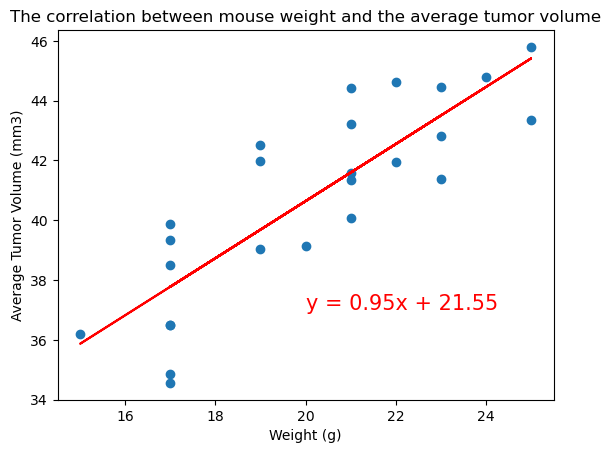

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
scat = Capomulin_df.groupby("Mouse ID").mean()

x_values = scat['Weight (g)']
y_values = scat['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
plt.title("The correlation between mouse weight and the average tumor volume")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")
plt.show()